In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from halton import *
from scipy.spatial import cKDTree

In [ ]:
n = 5000
n_boundary = 50

def boundary_param(t):
    return (np.cos(2*np.pi*t), np.sin(2*np.pi*t))

inner_nodes = halton_sequence(1,n,2).T
#circularize
inner_nodes = np.array([(np.sqrt(x)*np.cos(2*np.pi*y), np.sqrt(x)*np.sin(2*np.pi*y)) for (x,y) in inner_nodes])

#boundary_nodes = np.array([ boundary_param(t) for t in halton_sequence(0,n_boundary-1,1).ravel()])
boundary_nodes = np.array([ boundary_param(t) for t in np.linspace(0,1,n_boundary, endpoint=False).ravel()])

nodes = np.concatenate((inner_nodes, boundary_nodes), axis=0)

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(nodes[:,0], nodes[:,1], 'k.')

In [ ]:
quad1_inner = np.array([node for node in inner_nodes if node[0]>=0 and node[1]>0])
quad2_inner = np.array([node for node in inner_nodes if node[0]<0 and node[1]>=0])
quad3_inner = np.array([node for node in inner_nodes if node[0]<=0 and node[1]<0])
quad4_inner = np.array([node for node in inner_nodes if node[0]>0 and node[1]<=0])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=0 and node[1]>0])
quad2_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[1]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if node[0]<=0 and node[1]<0])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]>0 and node[1]<=0])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

In [ ]:
cutoff = 0.4039727532995172

quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
quad2_inner = np.array([node for node in inner_nodes if node[0]<cutoff and node[0]>=0])
quad3_inner = np.array([node for node in inner_nodes if node[0]<0 and node[0]>=-cutoff])
quad4_inner = np.array([node for node in inner_nodes if node[0]<-cutoff])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
quad2_boundary = np.array([node for node in boundary_nodes if node[0]<cutoff and node[0]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[0]>=-cutoff])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]<-cutoff])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

In [ ]:
cutoff = 0.4039727532995172

quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
quad2_inner = np.array([node for node in inner_nodes if cutoff>node[0]>-cutoff and node[1]>=0])
quad3_inner = np.array([node for node in inner_nodes if cutoff>node[0]>-cutoff and node[1]<0])
quad4_inner = np.array([node for node in inner_nodes if node[0]<=-cutoff])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
quad2_boundary = np.array([node for node in boundary_nodes if cutoff>node[0]>-cutoff and node[1]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if cutoff>node[0]>-cutoff and node[1]<0])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]<=-cutoff])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

In [ ]:
r = np.sqrt(np.pi/np.sqrt(27))

quad1_inner = np.array([node for node in inner_nodes 
        if node[1]>=-.5*r
        and (node[1]-r)*(np.sqrt(3/4)*r)<=(-1.5*r)*(node[0])
        and (node[1]-r)*(-np.sqrt(3/4)*r)>=(-1.5*r)*(node[0])
    ])

quad2_inner = np.array([node for node in inner_nodes 
        if (node[1]-r)*(np.sqrt(3/4)*r)>(-1.5*r)*(node[0])
        and node[0]>=0
        and node[1]>-1/np.sqrt(3)*node[0]
    ])

quad3_inner = np.array([node for node in inner_nodes 
        if (node[1]-r)*(-np.sqrt(3/4)*r)<(-1.5*r)*(node[0])
        and node[0]<0
        and node[1]>1/np.sqrt(3)*node[0]
    ])

quad4_inner = np.array([node for node in inner_nodes 
        if node[1]<-.5*r
        and node[1]<1/np.sqrt(3)*node[0]
        and node[1]<-1/np.sqrt(3)*node[0]
    ])


quad1_boundary=[]
quad2_boundary = np.array([node for node in boundary_nodes 
        if (node[1]-r)*(np.sqrt(3/4)*r)>(-1.5*r)*(node[0])
        and node[0]>=0
        and node[1]>-1/np.sqrt(3)*node[0]
    ])

quad3_boundary = np.array([node for node in boundary_nodes 
        if (node[1]-r)*(-np.sqrt(3/4)*r)<(-1.5*r)*(node[0])
        and node[0]<0
        and node[1]>1/np.sqrt(3)*node[0]
    ])

quad4_boundary = np.array([node for node in boundary_nodes 
        if node[1]<-.5*r
        and node[1]<1/np.sqrt(3)*node[0]
        and node[1]<-1/np.sqrt(3)*node[0]
    ])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.') 
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

#plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

In [ ]:
def decomp0(inner_nodes, boundary_nodes, stencil_size):
    k = stencil_size
    cutoff = 0.4039727532995172

    quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
    quad2_inner = np.array([node for node in inner_nodes if node[0]<cutoff and node[0]>=0])
    quad3_inner = np.array([node for node in inner_nodes if node[0]<0 and node[0]>=-cutoff])
    quad4_inner = np.array([node for node in inner_nodes if node[0]<-cutoff])

    quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
    quad2_boundary = np.array([node for node in boundary_nodes if node[0]<cutoff and node[0]>=0])
    quad3_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[0]>=-cutoff])
    quad4_boundary = np.array([node for node in boundary_nodes if node[0]<-cutoff])

    quad1_neighbors = np.zeros((len(quad1_inner), k))
    quad_local = np.concatenate((quad1_inner, quad2_inner, quad1_boundary, quad2_boundary), axis=0)
    tree = cKDTree(nodes)
    indices = tree.query(nodes[k],l)[1]

In [ ]:
test = [node for node in quad1_inner if node in quad4_inner]

# 2proc testing

In [ ]:
n = 2000
n_boundary = 25

def boundary_param(t):
    return (np.cos(2*np.pi*t), np.sin(2*np.pi*t))

inner_nodes = halton_sequence(1,n,2).T
#circularize
inner_nodes = np.array([(np.sqrt(x)*np.cos(2*np.pi*y), np.sqrt(x)*np.sin(2*np.pi*y)) for (x,y) in inner_nodes])

#boundary_nodes = np.array([ boundary_param(t) for t in halton_sequence(0,n_boundary-1,1).ravel()])
boundary_nodes = np.array([ boundary_param(t) for t in np.linspace(0,1,n_boundary, endpoint=False).ravel()])

nodes = np.concatenate((inner_nodes, boundary_nodes), axis=0)

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(nodes[:,0], nodes[:,1], 'k.')

In [ ]:
k = 10

nodes1 = np.array([node for node in inner_nodes if node[0]>=0])
nodes2 = np.array([node for node in inner_nodes if node[0]<0])
#nodes1_boundary = np.array([node for node in boundary_nodes if node[0]>=0])
#nodes2_boundary = np.array([node for node in boundary_nodes if node[0]<0])

neighbors = np.zeros((len(nodes1), k), dtype=np.int32)

nodes = np.concatenate((nodes1, nodes2, boundary_nodes), axis=0)
tree = cKDTree(nodes)
#indices = tree.query(nodes[k],l)[1]
for r in range(len(nodes1)):
    neighbors[r,:] = tree.query(nodes[r],k)[1]

n_to_g = []
b_to_g = []
local_start = 0
local_end = len(nodes1) - 1
boundary_start = len(nodes1)+len(nodes2)
for i in neighbors.ravel():
    if i<local_start or local_end<i<boundary_start:
        if i not in n_to_g:
            n_to_g += [i]
    elif boundary_start<= i:
        if i not in b_to_g:
            b_to_g += [i]
        
node1_n = np.array([nodes[i] for i in n_to_g])
node1_b = np.array([nodes[i] for i in b_to_g])

nodes1 = np.concatenate((nodes1, node1_n, node1_b), axis=0)

plt.figure(figsize=(4,4))
plt.plot(nodes1[:,0], nodes1[:,1], 'r.')
plt.plot(nodes2[:,0], nodes2[:,1], 'b.')
plt.plot(boundary_nodes[:,0], boundary_nodes[:,1], 'y.')

plt.plot(node1_n[:,0], node1_n[:,1], 'g.')
plt.plot(node1_b[:,0], node1_b[:,1], 'k.')

In [ ]:
neighbors[:10]

In [ ]:
len(nodes2) - len(n_to_g)

In [ ]:
node1_n

In [ ]:
5 > 2 < 1

In [ ]:
test = {}
test[1] = 4
test[3] = 5

In [ ]:
test[1]

In [ ]:
test[2]

In [7]:
def halton(n):
    inner_nodes = halton_sequence(1,n,2).T
    inner_nodes = np.array([(np.sqrt(x)*np.cos(2*np.pi*y), 
                             np.sqrt(x)*np.sin(2*np.pi*y)) 
                            for (x,y) in inner_nodes])
    return inner_nodes

def vogel(n):
    theta_hat = np.pi*(3-np.sqrt(5))
    inner_nodes = np.array([ (np.sqrt(i/n)*np.cos(i*theta_hat), 
                              np.sqrt(i/n)*np.sin(i*theta_hat)) for i in range(1,n+1)])
    return inner_nodes


def boundary_param(t):
    return (np.cos(2*np.pi*t), np.sin(2*np.pi*t))

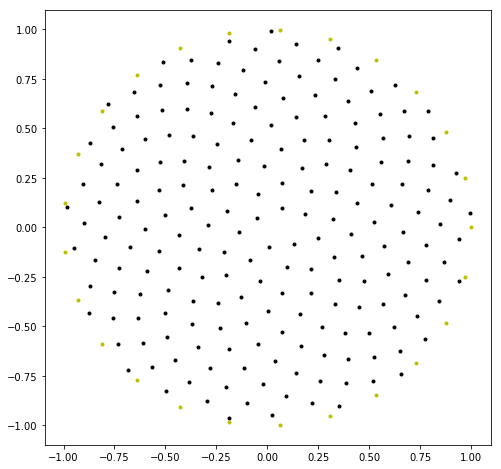

In [12]:
n = 200
n_boundary = 25
inner_nodes = vogel(n)
boundary_nodes = np.array([ boundary_param(t) for t in np.linspace(0,1,n_boundary, endpoint=False).ravel()])

plt.figure(figsize=(8,8))
plt.plot(inner_nodes[:,0], inner_nodes[:,1],'k.')
plt.plot(boundary_nodes[:,0], boundary_nodes[:,1], 'y.')

Quad1 nodes: 59
Quad2 nodes: 54
Quad3 nodes: 52
Quad4 nodes: 60


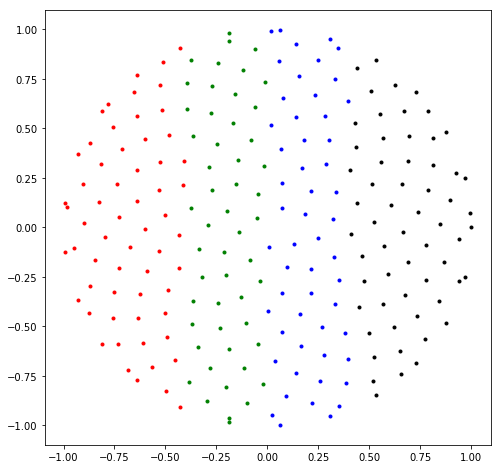

In [14]:
cutoff = 0.4039727532995172

quad1_inner = np.array([node for node in inner_nodes if node[0]>=cutoff])
quad2_inner = np.array([node for node in inner_nodes if node[0]<cutoff and node[0]>=0])
quad3_inner = np.array([node for node in inner_nodes if node[0]<0 and node[0]>=-cutoff])
quad4_inner = np.array([node for node in inner_nodes if node[0]<-cutoff])

quad1_boundary = np.array([node for node in boundary_nodes if node[0]>=cutoff])
quad2_boundary = np.array([node for node in boundary_nodes if node[0]<cutoff and node[0]>=0])
quad3_boundary = np.array([node for node in boundary_nodes if node[0]<0 and node[0]>=-cutoff])
quad4_boundary = np.array([node for node in boundary_nodes if node[0]<-cutoff])

plt.figure(figsize=(8,8))
plt.plot(quad1_inner[:,0], quad1_inner[:,1], 'k.')
plt.plot(quad2_inner[:,0], quad2_inner[:,1], 'b.')
plt.plot(quad3_inner[:,0], quad3_inner[:,1], 'g.')
plt.plot(quad4_inner[:,0], quad4_inner[:,1], 'r.')

plt.plot(quad1_boundary[:,0], quad1_boundary[:,1], 'k.')
plt.plot(quad2_boundary[:,0], quad2_boundary[:,1], 'b.')
plt.plot(quad3_boundary[:,0], quad3_boundary[:,1], 'g.')
plt.plot(quad4_boundary[:,0], quad4_boundary[:,1], 'r.')

print('Quad1 nodes: %d' % (len(quad1_inner) + len(quad1_boundary)))
print('Quad2 nodes: %d' % (len(quad2_inner) + len(quad2_boundary)))
print('Quad3 nodes: %d' % (len(quad3_inner) + len(quad3_boundary)))
print('Quad4 nodes: %d' % (len(quad4_inner) + len(quad4_boundary)))

In [22]:
inner_nodes = nodes = np.concatenate((quad1_inner, quad2_inner, quad3_inner, quad4_inner), axis=0)
nodes = np.concatenate((inner_nodes, boundary_nodes), axis=0)
tree = cKDTree(nodes)

In [20]:
inner_nodes[:10, 0]

array([0.4109028 , 0.44196063, 0.46325047, 0.40762353, 0.52372028,
       0.47655257, 0.51667364, 0.57514528, 0.43539063, 0.44944349])

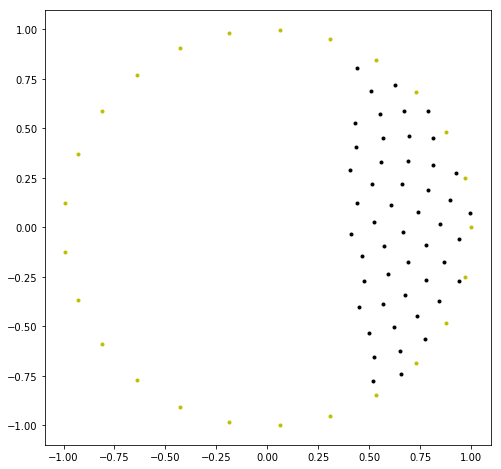

In [23]:
plt.figure(figsize=(8,8))
plt.plot(inner_nodes[:50, 0], inner_nodes[:50, 1], 'k.')
plt.plot(boundary_nodes[:,0], boundary_nodes[:,1], 'y.')